In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

# 디렉토리 확인 및 데이터 로드 

In [3]:
%pwd

'C:\\Users\\김도연'

In [4]:
%ls 

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 949E-3DEA

 C:\Users\김도연 디렉터리

2021-02-14  오후 10:12         4,091,870  EDA of bookings and ML to predict cancelations.ipynb
2021-02-24  오후 05:14    <DIR>          .
2021-02-24  오후 05:14    <DIR>          ..
2019-11-08  오후 10:04    <DIR>          .android
2020-11-24  오후 10:39               260 .bash_history
2021-02-01  오후 07:54    <DIR>          .conda
2021-02-01  오후 07:47                43 .condarc
2021-02-23  오후 04:00    <DIR>          .ipynb_checkpoints
2020-11-10  오후 06:42    <DIR>          .ipython
2021-02-01  오후 04:39    <DIR>          .jupyter
2020-12-08  오후 01:27    <DIR>          .LdVirtualBox
2021-02-03  오후 06:24    <DIR>          .matplotlib
2021-02-13  오후 11:57         1,778,302 03-apt-price-eda-output.ipynb
2021-02-14  오전 01:43           121,691 04-coffee-store-choropleth.html
2021-02-14  오전 12:17            29,035 04-coffee-store-input.ipynb
2021-02-14  오전 01:44         4,569,648 04-coffee-store-output.ipynb
2021-02-18  오후 04:20         3,62

In [5]:
df = pd.read_csv("Card.csv")
df.shape

(24697792, 12)

# 데이터 메모리 최소화 작업

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [7]:
df['SEX_CTGO_CD']=df['SEX_CTGO_CD'].astype('category')

In [8]:
df['CNT']=df['CNT'].astype('int32')

In [9]:
df['FLC']=df['FLC'].astype('category')

In [10]:
df['CSTMR_CNT']=df['CSTMR_CNT'].astype('int32')

In [11]:
df['REG_YYMM']=df['REG_YYMM'].astype('int32')

In [12]:
pd.options.display.float_format = '{:.2f}'.format

In [13]:
df.describe()

,REG_YYMM,CSTMR_CNT,AMT,CNT
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,201923.06,61.97,2441352.94,126.04
std,36.20,355.92,17260959.04,966.94
min,201901.00,3.00,20.00,1.00
25%,201904.00,4.00,90200.00,5.00
50%,201908.00,8.00,252680.00,12.00
75%,201911.00,24.00,843337.25,40.00
max,202003.00,32813.00,2349523701.00,120357.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype   
---  ------        -----   
 0   REG_YYMM      int32   
 1   CARD_SIDO_NM  object  
 2   CARD_CCG_NM   object  
 3   STD_CLSS_NM   object  
 4   HOM_SIDO_NM   object  
 5   HOM_CCG_NM    object  
 6   AGE           object  
 7   SEX_CTGO_CD   category
 8   FLC           category
 9   CSTMR_CNT     int32   
 10  AMT           int64   
 11  CNT           int32   
dtypes: category(2), int32(3), int64(1), object(6)
memory usage: 1.6+ GB


# 결측치 처리 

In [15]:
df.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

<AxesSubplot:>

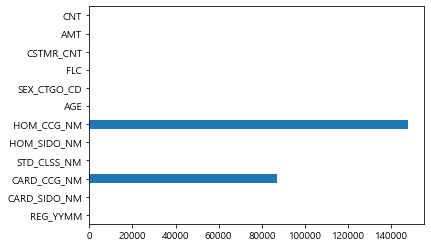

In [16]:
df.isnull().sum().plot.barh()

In [17]:
df[df['HOM_CCG_NM'].isnull()]['HOM_SIDO_NM'].value_counts()

세종    147787
Name: HOM_SIDO_NM, dtype: int64

In [18]:
df['HOM_CCG_NM']=df['HOM_CCG_NM'].fillna('세종시')

In [19]:
df.isnull().sum()

REG_YYMM            0
CARD_SIDO_NM        0
CARD_CCG_NM     87213
STD_CLSS_NM         0
HOM_SIDO_NM         0
HOM_CCG_NM          0
AGE                 0
SEX_CTGO_CD         0
FLC                 0
CSTMR_CNT           0
AMT                 0
CNT                 0
dtype: int64

In [20]:
df[df['CARD_CCG_NM'].isnull()]['CARD_SIDO_NM'].value_counts()

세종    87213
Name: CARD_SIDO_NM, dtype: int64

In [21]:
df['CARD_CCG_NM']=df['CARD_CCG_NM'].fillna('세종시')

In [22]:
df.isnull().sum()

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

# 이상치 확인

In [23]:
df.describe()

,REG_YYMM,CSTMR_CNT,AMT,CNT
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,201923.06,61.97,2441352.94,126.04
std,36.20,355.92,17260959.04,966.94
min,201901.00,3.00,20.00,1.00
25%,201904.00,4.00,90200.00,5.00
50%,201908.00,8.00,252680.00,12.00
75%,201911.00,24.00,843337.25,40.00
max,202003.00,32813.00,2349523701.00,120357.00


AMT와 CNT의 최대값이 3분위와 차이가 크다.

## AMT 기준 3분위수 이상 데이터 특이점

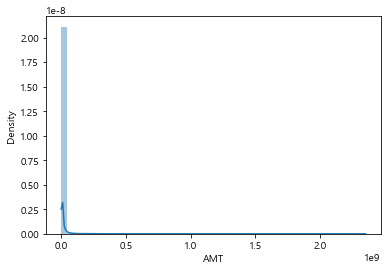

In [24]:
sns.distplot(df['AMT']);

In [25]:
df.describe()

,REG_YYMM,CSTMR_CNT,AMT,CNT
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,201923.06,61.97,2441352.94,126.04
std,36.20,355.92,17260959.04,966.94
min,201901.00,3.00,20.00,1.00
25%,201904.00,4.00,90200.00,5.00
50%,201908.00,8.00,252680.00,12.00
75%,201911.00,24.00,843337.25,40.00
max,202003.00,32813.00,2349523701.00,120357.00


In [26]:
df_high=df[df['AMT']>=843337.25]
df_high

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
6,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,21,3690830,21
7,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3573300,20
...,...,...,...,...,...,...,...,...,...,...,...,...
24697780,202003,충북,충주시,화장품 및 방향제 소매업,충북,충주시,50s,1,4,66,5187100,79
24697781,202003,충북,충주시,화장품 및 방향제 소매업,충북,충주시,50s,2,4,166,16603400,189
24697782,202003,충북,충주시,화장품 및 방향제 소매업,충북,충주시,60s,1,5,45,5078720,52
24697783,202003,충북,충주시,화장품 및 방향제 소매업,충북,충주시,60s,2,5,102,9341125,106


3분위 이상 AMT 분포

In [27]:
df_high=df[df['AMT']>=843337.25]

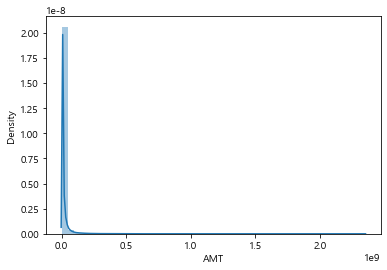

In [28]:
sns.distplot(df_high['AMT']);

3분위 이하 AMT 데이터 분포

In [29]:
df_low=df[df['AMT']<843337.25]

<AxesSubplot:xlabel='AMT', ylabel='Density'>

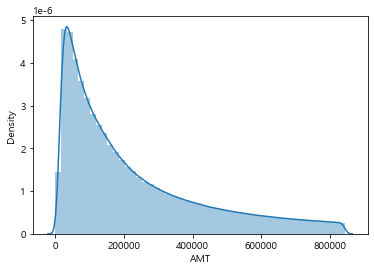

In [30]:
sns.distplot(df_low['AMT'])

AMT가 대부분 0~20000 값 사이에 분포하고 있음을 알 수 있다. 

영업점 시도 기준 AMT 3분위 이상 데이터 분포

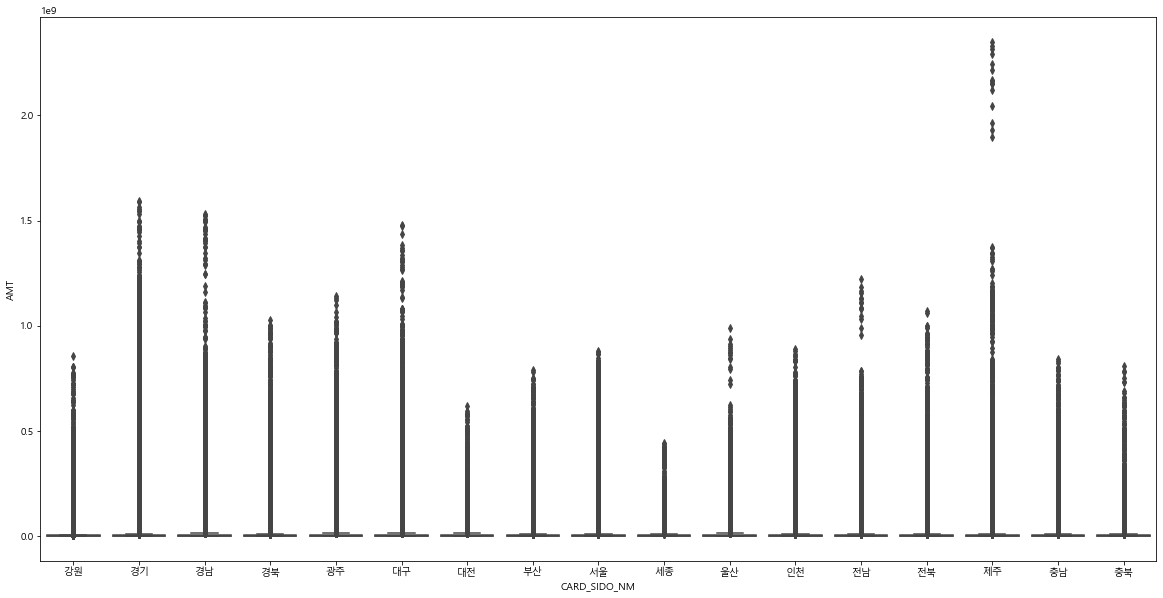

In [31]:
var='CARD_SIDO_NM'
data=pd.concat([df_high['AMT'],df_high[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='AMT',data=data)


영업점 시도 기준 AMT 3분위 이하 데이터 분포

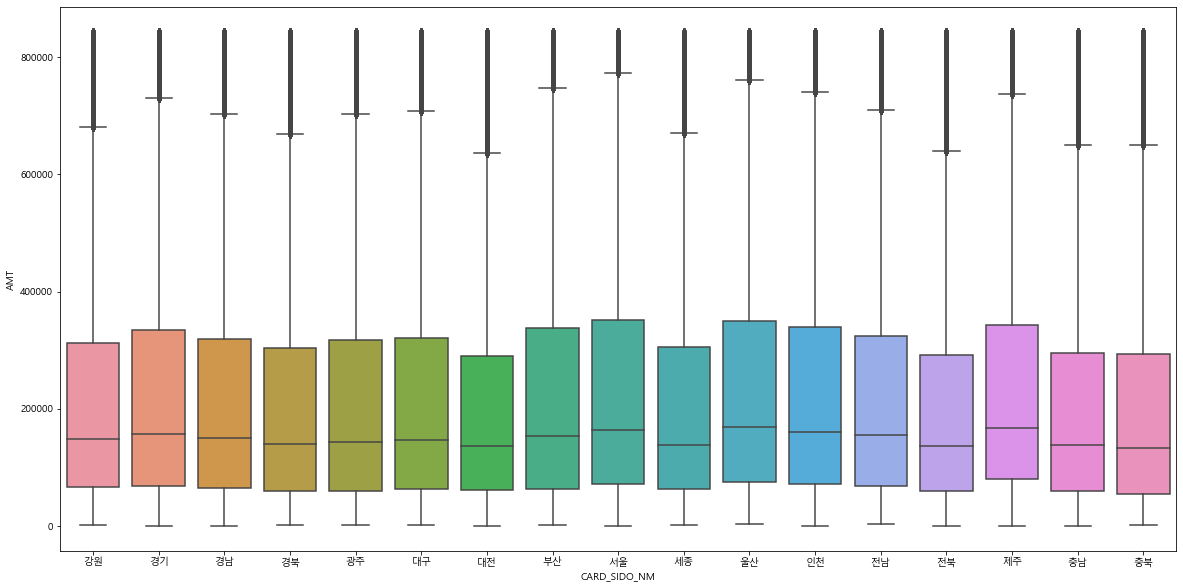

In [32]:
var='CARD_SIDO_NM'
data=pd.concat([df_low['AMT'],df_low[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='AMT',data=data)


고객 주소지 시도 기준 AMT 3분위 이상 데이터 분포

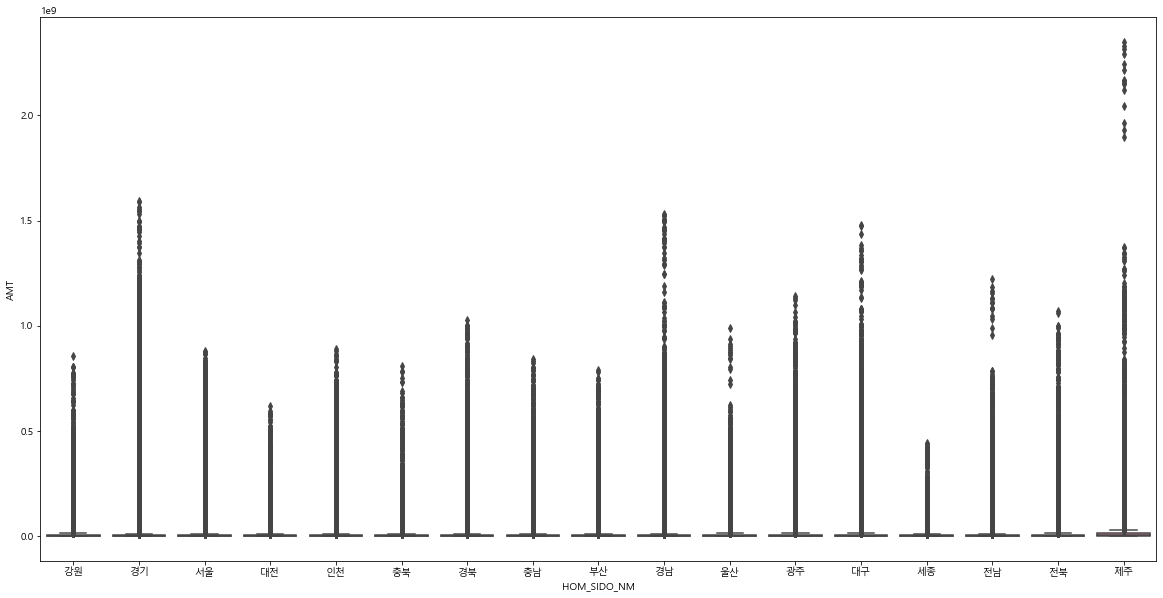

In [33]:
var='HOM_SIDO_NM'
data=pd.concat([df_high['AMT'],df_high[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='AMT',data=data)


고객 주소지 시도 기준 AMT 3분위 이하 데이터 분포

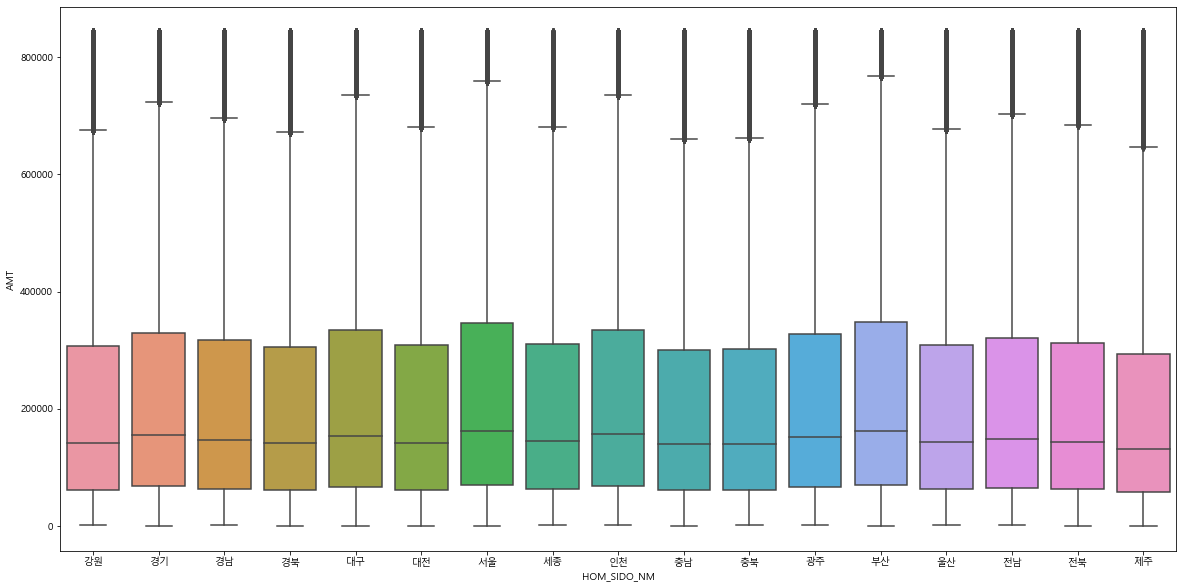

In [34]:
var='HOM_SIDO_NM'
data=pd.concat([df_low['AMT'],df_low[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='AMT',data=data)

제주도에 거주지를 갖고 있는 고객이 제주도 내에 영업점에서  AMT가 가장 높게 나타났다. 

In [35]:
df[df['CARD_SIDO_NM']=='제주'].sort_values('AMT',ascending=False).head(10)

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
13451048,201908,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,32813,2349523701,59062
20295408,201912,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,31378,2328668609,56556
8146986,201905,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,31932,2314765651,57064
1488125,201901,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,30513,2293735545,55470
11592263,201907,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,31609,2242949391,56776
4734109,201903,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,30985,2214022562,55085
21964388,202001,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,29610,2170470327,52722
16947263,201910,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,31265,2162859129,57105
9867226,201906,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,31060,2153175872,55044
6385785,201904,제주,제주시,한식 음식점업,제주,제주시,50s,1,4,30641,2149619954,53793


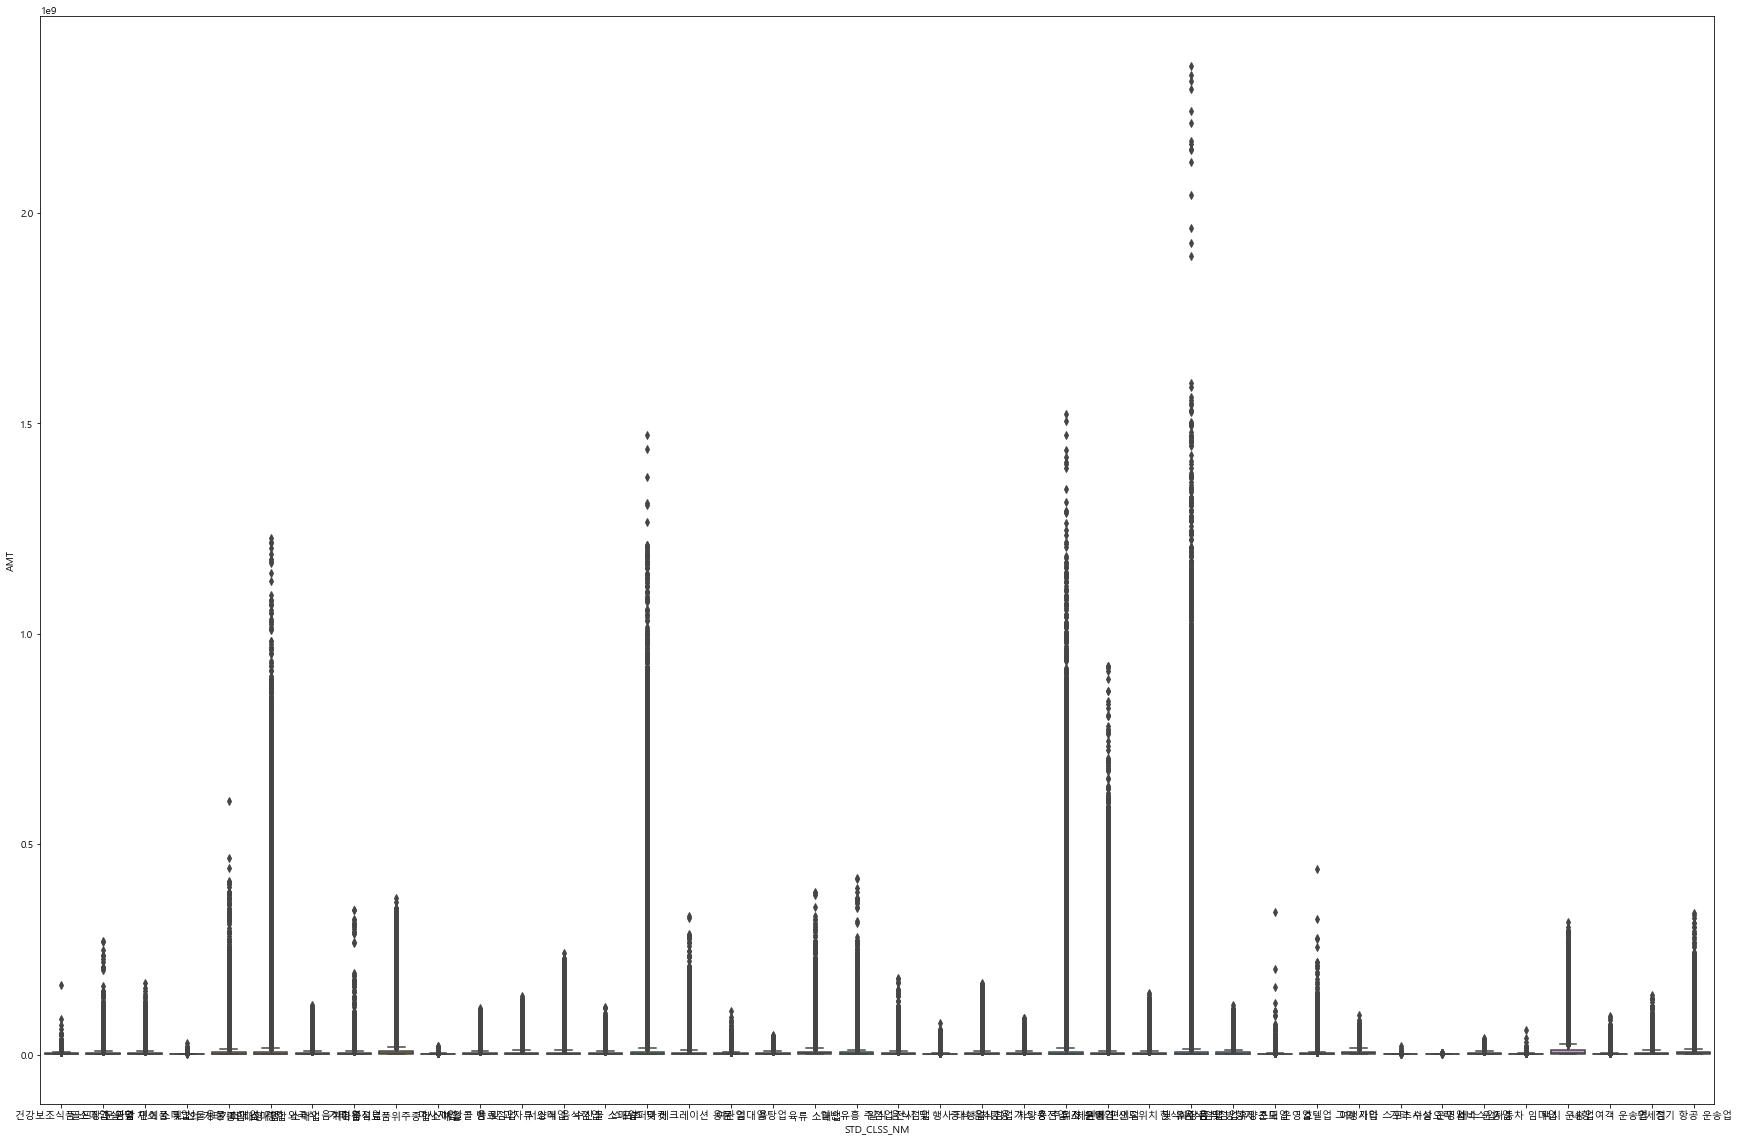

In [36]:
var='STD_CLSS_NM'
data=pd.concat([df_high['AMT'],df_high[var]],axis=1)
f, ax= plt.subplots(figsize=(30,20))
fig= sns.boxplot(x=var, y='AMT',data=data)


In [37]:
data.sort_values(by='AMT',ascending=False)

,AMT,STD_CLSS_NM
13451048,2349523701,한식 음식점업
20295408,2328668609,한식 음식점업
8146986,2314765651,한식 음식점업
1488125,2293735545,한식 음식점업
11592263,2242949391,한식 음식점업
...,...,...
11053783,843340,그외 기타 종합 소매업
5401000,843339,차량용 주유소 운영업
22207332,843339,차량용 주유소 운영업
1482270,843338,차량용 가스 충전업


가장 AMT가 높았던 업종은 한식 음식점업이었다.

In [77]:
pd.DataFrame(df.groupby('REG_YYMM')['AMT'].sum()).reset_index()

,REG_YYMM,AMT
0,201901,4052317259025
1,201902,3634345832156
2,201903,4105409759731
3,201904,4006698507386
4,201905,4345471235813
5,201906,4122105394194
6,201907,4187299694709
7,201908,4268655968810
8,201909,4123348058794
9,201910,4176583723584


# EDA

<AxesSubplot:xlabel='REG_YYMM', ylabel='AMT'>

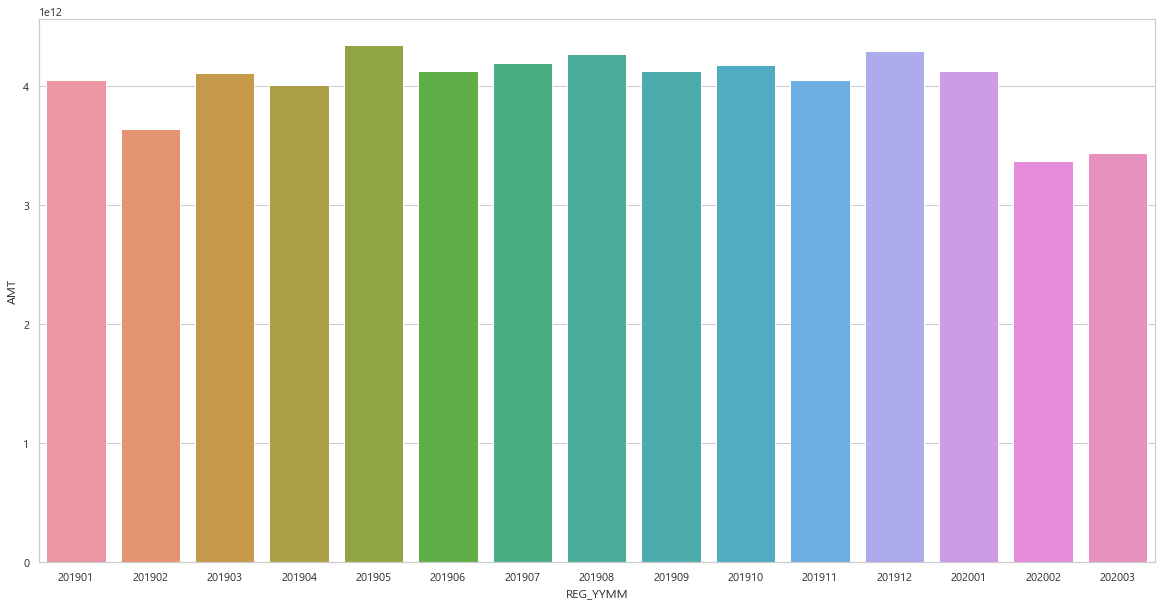

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(data=pd.DataFrame(df.groupby('REG_YYMM')['AMT'].sum()).reset_index(),x='REG_YYMM',y='AMT',ci=None)

코로나 (2020년 02월)이후로 감소했지만 이외 뚜렷한 특징은 찾기 힘들다

<AxesSubplot:xlabel='CARD_SIDO_NM', ylabel='AMT'>

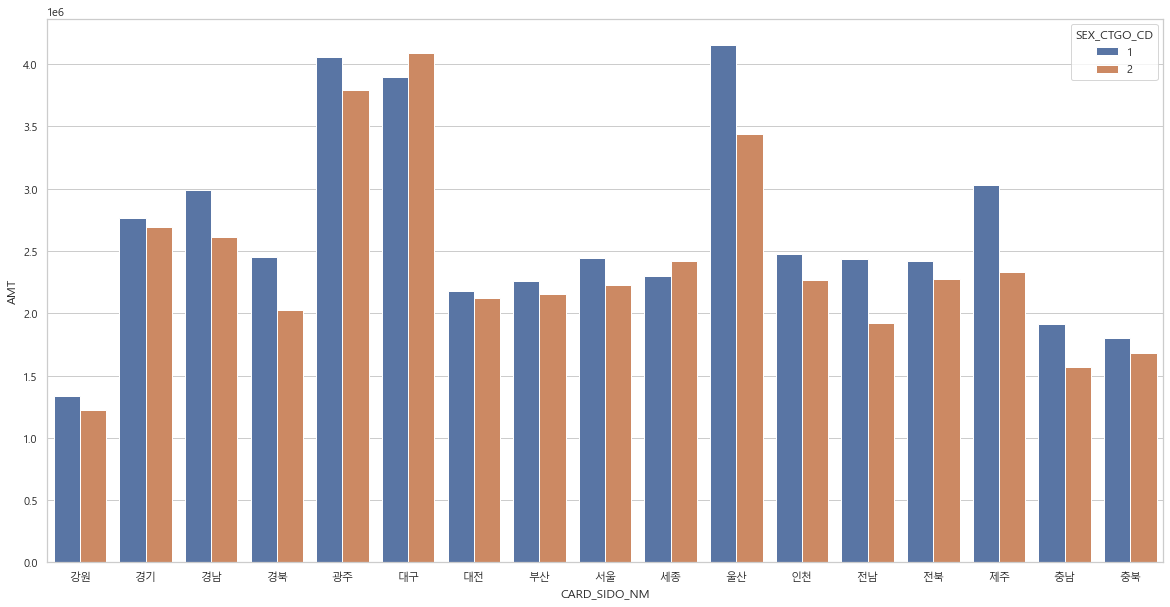

In [67]:
#성별별 지역별 총매출 

plt.figure(figsize=(20,10))
sns.barplot(x='CARD_SIDO_NM',y='AMT',hue='SEX_CTGO_CD',data=df,ci=None)

<AxesSubplot:xlabel='CARD_SIDO_NM'>

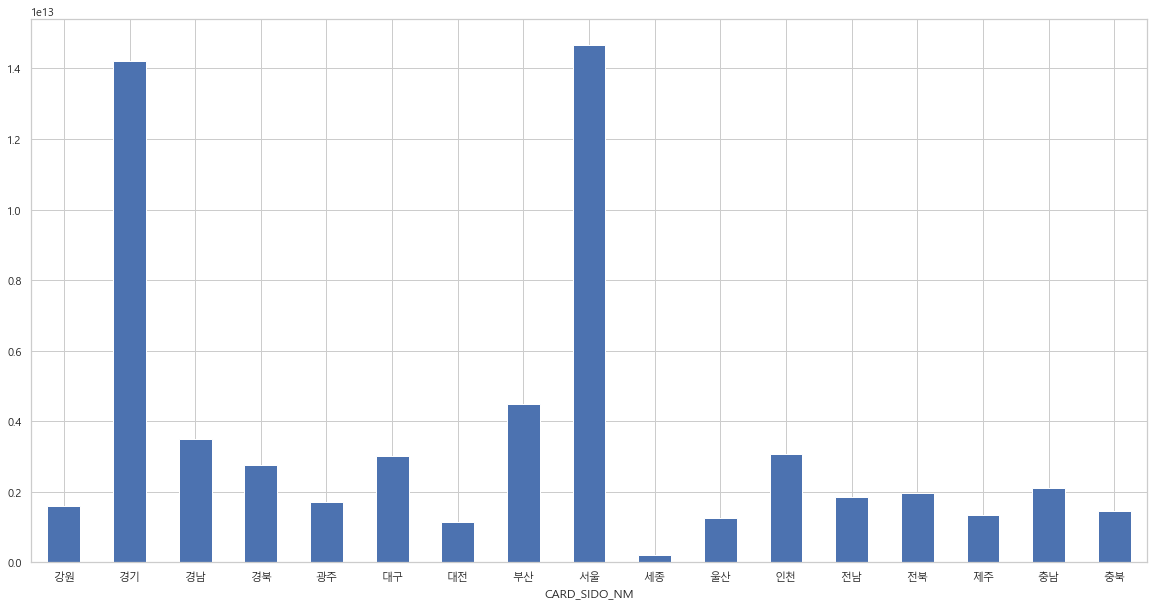

In [54]:
#매장 주소지 별 카드 사용총액
df.groupby('CARD_SIDO_NM')['AMT'].sum().plot.bar(figsize=(20,10),rot=0)

<AxesSubplot:xlabel='HOM_SIDO_NM'>

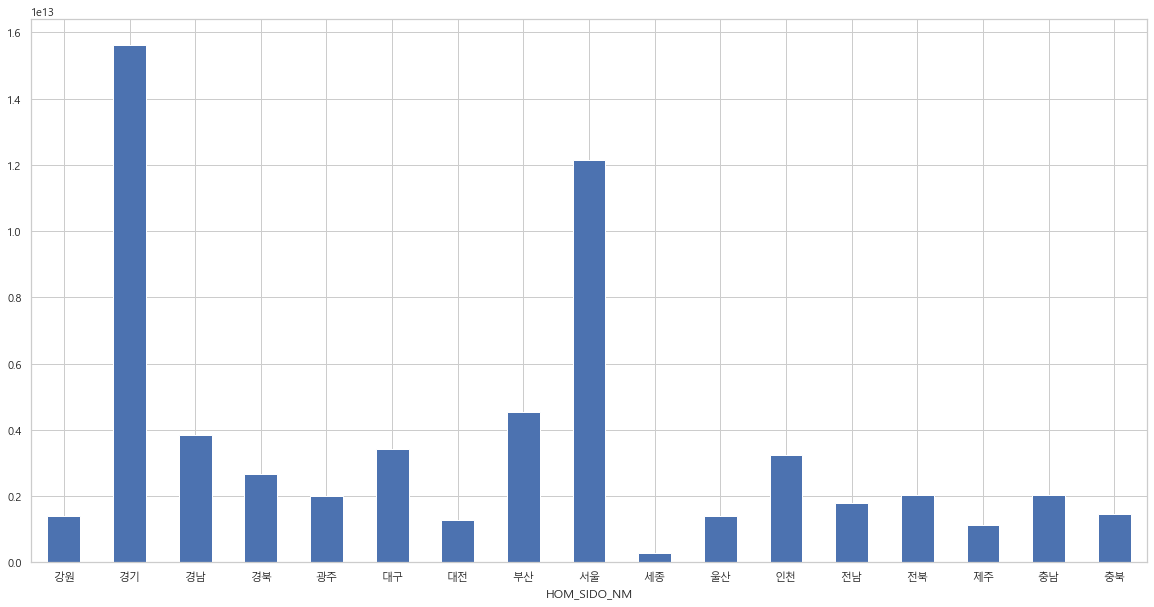

In [55]:
#고객 주소지 별 카드 사용총액
df.groupby('HOM_SIDO_NM')['AMT'].sum().plot.bar(figsize=(20,10),rot=0)

주소지가 경기인사람이 서울에가서 오프라인 신용카드 결제를 많이 한다. 

<AxesSubplot:xlabel='CARD_SIDO_NM', ylabel='count'>

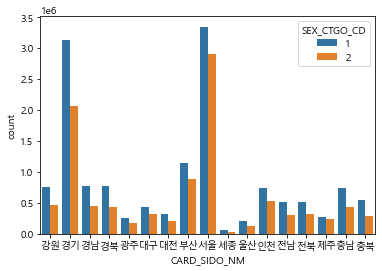

In [39]:
sns.countplot(x='CARD_SIDO_NM',hue='SEX_CTGO_CD',data=df)

KeyboardInterrupt: 

<AxesSubplot:xlabel='AGE'>

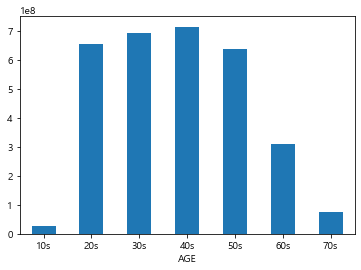

In [42]:
#연령대별 신용카드 이용 건수 

df.groupby('AGE')['CNT'].sum().plot.bar(rot=0)

<AxesSubplot:xlabel='AGE'>

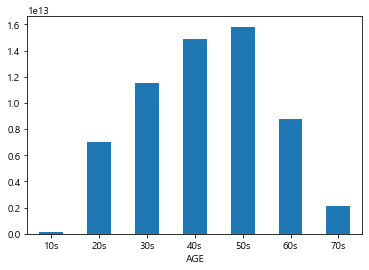

In [41]:
#연령대 별 AMT총액

df.groupby('AGE')['AMT'].sum().plot.bar(rot=0)

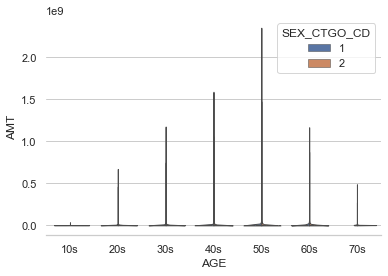

In [49]:
# df로 violinplot을 그리면 최대값 때문에 해석하기 힘든 그래프가 그려진다. 
# 따라서, df_low로 그리는 방향도 고민해 봐야한다. 


sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df, x="AGE", y="AMT", hue="SEX_CTGO_CD",
               split=True, inner="quart", linewidth=1,order=['10s','20s','30s','40s','50s','60s','70s',])
sns.despine(left=True)

<AxesSubplot:>

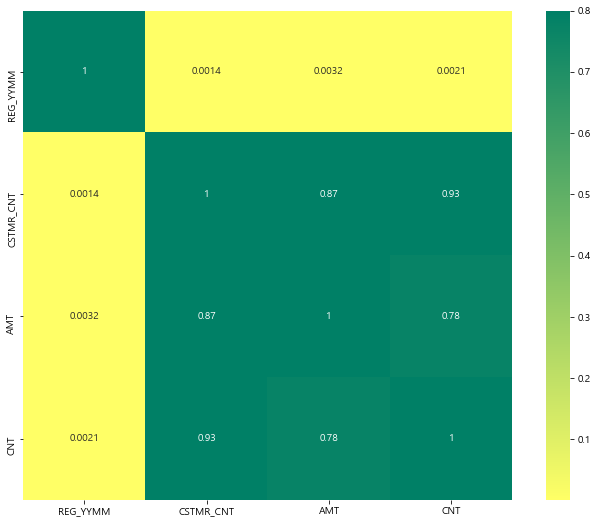

In [54]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='summer_r',annot=True)